<a href="https://colab.research.google.com/github/carascott/1stproject/blob/main/MichelleCaraSaveTheDay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

In [217]:
# Below is the professor's code chunk for reading in the data
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    #print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

In [218]:
match = [col for col in df.columns if 'educ' in col]
print("Column names:", match)

Column names: ['educ', 'paeduc', 'maeduc', 'speduc', 'coeduc', 'nateduc', 'nateducy', 'nateducz', 'educop', 'coneduc', 'coneducy', 'sexeduc', 'educ1', 'educ2', 'educ3', 'educ4', 'educ5', 'sppaeduc', 'spmaeduc', 'kdeduc1', 'kdeduc2', 'kdeduc3', 'kdeduc4', 'kdeduc5', 'kdeduc6', 'kdeduc7', 'kdeduc8', 'kdeduc9', 'sbeduc', 'voleduc', 'moneduc', 'hrseduc', 'giveduc', 'toteduc', 'valeduc', 'educ30', 'inteduc', 'opeduc', 'richeduc', 'educemp', 'reducemp', 'payeduc', 'immeduc', 'chldeduc', 'sei10educ', 'pasei10educ', 'masei10educ', 'spsei10educ', 'cosei10educ']


In [219]:
unique_responses = df['degree'].value_counts()
print("Unique Responses:")
print(unique_responses)

na_count = df['degree'].isna().sum()
# Print the number of NAs
print(f"Number of NAs in '{'degree'}': {na_count}")

Unique Responses:
high school                      11604
bachelor's                        4750
graduate                          2919
less than high school             2840
associate/junior college          1982
not imputable_(2147483638)           0
not available in this year           0
not available in this release        0
uncodeable                           0
skipped on web                       0
refused                              0
no answer                            0
not imputable_(2147483637)           0
dk, na, iap                          0
I don't have a job                   0
iap                                  0
don't know                           0
see codebook                         0
Name: degree, dtype: int64
Number of NAs in 'degree': 35


In [220]:
# Age cleaning
df = df.dropna(subset=['age'])

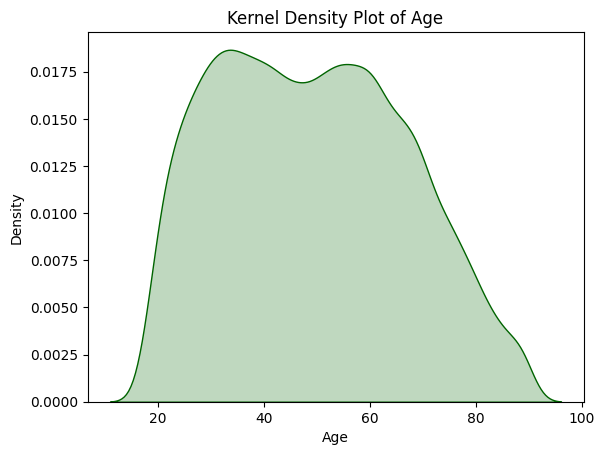

In [221]:
sns.kdeplot(data=df['age'], fill=True, color='darkgreen')
plt.title('Kernel Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [222]:
# Income cleaning
df['income_group'] = pd.cut(df['coninc'], bins=range(0, 200001, 25000), right=False, include_lowest=True)
# Create dummy columns for each income group
income_dummies = pd.get_dummies(df['income_group'])
income_dummies.columns = [f'Between ${i} and ${i + 24999}' for i in range(0, 200000, 25000)]
df = pd.concat([df, income_dummies], axis=1)
df = df.dropna(subset=['income_group'])

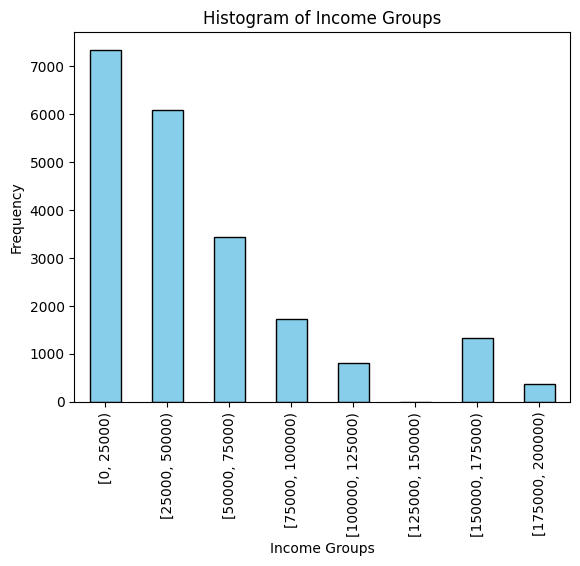

In [223]:
df['income_group'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Income Groups')
plt.xlabel('Income Groups')
plt.ylabel('Frequency')
plt.show()

In [224]:
# Happy ranking cleaning
categories = ['pretty happy', 'very happy', 'not too happy', 'unanswered']
df['happy'] = pd.Categorical(df['happy'], categories=categories, ordered=True)
# Replace NAs in 'happy' column with 'unanswered'
df['happy'].fillna('unanswered', inplace=True)

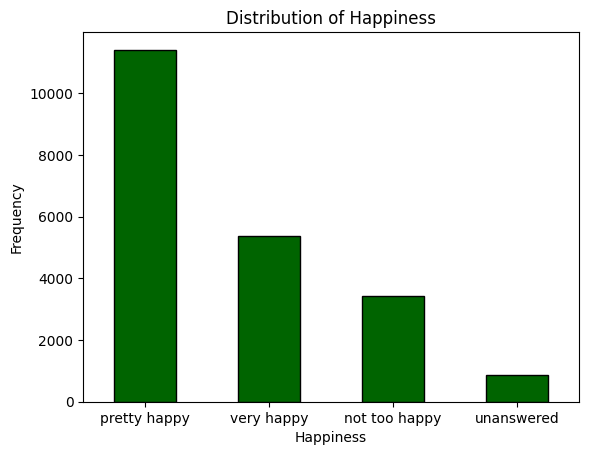

In [225]:
df['happy'].value_counts().sort_index().plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title('Distribution of Happiness')
plt.xlabel('Happiness')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [226]:
# Health ranking cleaning
cat_health = ['good', 'excellent', 'fair', 'poor', 'unanswered']
df['health'] = pd.Categorical(df['health'], categories=cat_health, ordered=True)
# Replace NAs in 'health' column with 'unanswered'
df['health'].fillna('unanswered', inplace=True)

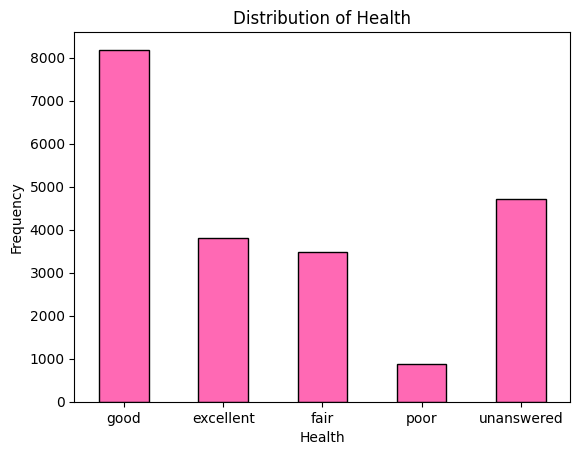

In [227]:
df['health'].value_counts().sort_index().plot(kind='bar',
                                              color='hotpink', edgecolor='black')
plt.title('Distribution of Health')
plt.xlabel('Health')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [228]:
# Sex cleaning
cat_sex = ['female', 'male', 'unanswered']
df['sex'] = pd.Categorical(df['sex'], categories=cat_sex, ordered=True)
# Replace NAs in 'sex' column with 'unanswered'
df['sex'].fillna('unanswered', inplace=True)

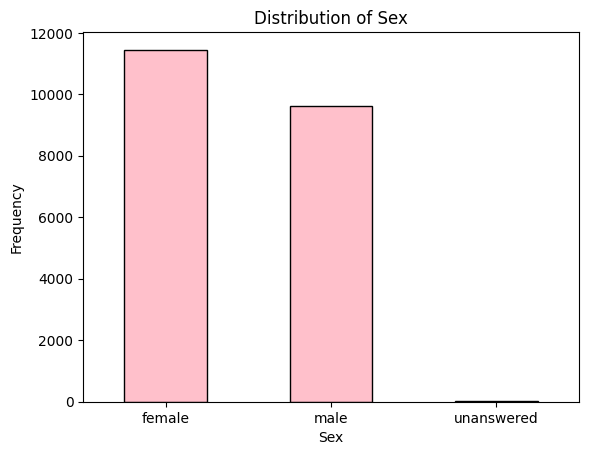

In [229]:
df['sex'].value_counts().sort_index().plot(kind='bar',
                                              color='pink', edgecolor='black')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [230]:
# Marital status cleaning
cat_marital = ['married', 'never married', 'divorced', 'widowed', 'separated',
               'unanswered']
df['marital'] = pd.Categorical(df['marital'], categories=cat_marital, ordered=True)
# Replace NAs in 'marital' column with 'unanswered'
df['marital'].fillna('unanswered', inplace=True)

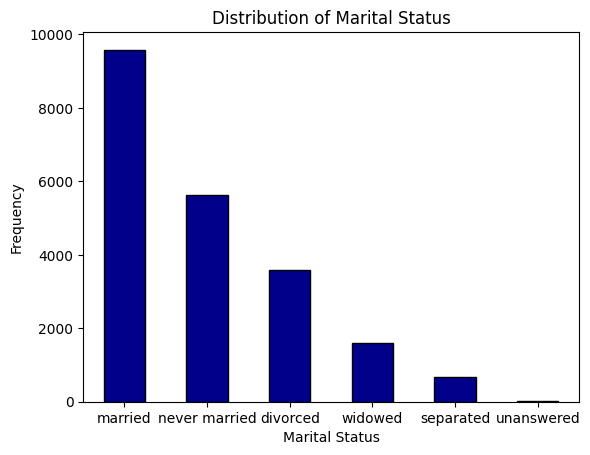

In [231]:
df['marital'].value_counts().sort_index().plot(kind='bar',
                                              color='darkblue', edgecolor='black')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [232]:
# Degree cleaning
cat_deg = ['less than high school', 'high school', 'associate/junior college',
           "bachelor's", 'graduate',
               'unanswered']
df['degree'] = pd.Categorical(df['degree'], categories=cat_deg, ordered=True)
# Replace NAs in 'sex' column with 'unanswered'
df['degree'].fillna('unanswered', inplace=True)

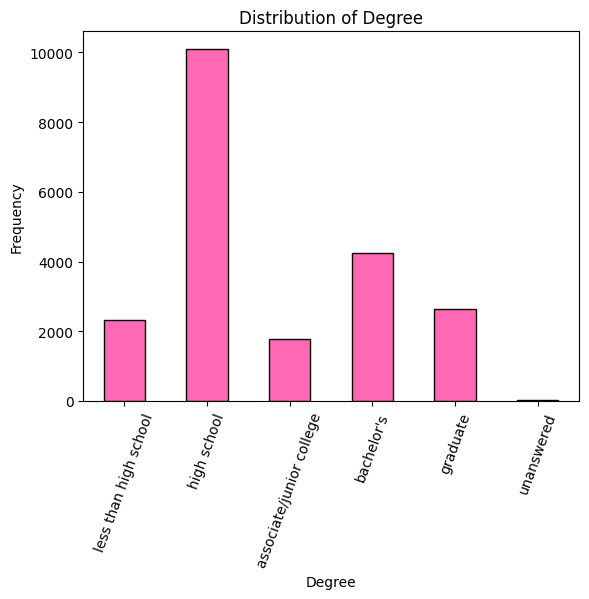

In [233]:
df['degree'].value_counts().sort_index().plot(kind='bar',
                                              color='hotpink', edgecolor='black')
plt.title('Distribution of Degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xticks(rotation=70)  # Rotate x-axis labels if needed
plt.show()

In [237]:
df = df.loc[:, ['age', 'sex', 'marital', 'income_group', 'degree', 'happy', 'health']]

In [238]:
df.to_csv('MichelleCara.csv', index=False)